In [14]:
# import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Faiza's code
#Initial code cleanup
filename_read = '/Users/valliramaswamy/Documents/MSci Data Science/Year-3/2IntrotoAI/group3CW/Clean_Dataset.csv'
df =pd.read_csv(filename_read, index_col = 0)

#Sorting values by airline
df = df.sort_values(by='airline', ascending=True)

#Checking overall and asking for sum of null values
df.isnull().values.all().sum()

# Dropping Flight column
df.drop('flight', 1, inplace=True)

# Changing price to Pounds
df["price"] = (df["price"]*0.011).round(2)

# Printinf dataset
print(df)

        airline source_city departure_time        stops arrival_time  \
184894  AirAsia     Chennai          Night          one      Morning   
186660  AirAsia     Chennai        Morning  two_or_more   Late_Night   
186659  AirAsia     Chennai        Morning          one   Late_Night   
186658  AirAsia     Chennai        Morning  two_or_more        Night   
186657  AirAsia     Chennai        Morning          one        Night   
...         ...         ...            ...          ...          ...   
211524  Vistara       Delhi        Evening          one        Night   
87243   Vistara   Bangalore        Evening          one   Late_Night   
87244   Vistara   Bangalore        Morning          one    Afternoon   
87482   Vistara   Bangalore        Morning          one      Evening   
300152  Vistara     Chennai        Morning          one      Evening   

       destination_city     class  duration  days_left   price  
184894            Delhi   Economy     10.92         33   27.25  
18666

<ipython-input-14-3aec2c10b62d>:32: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('flight', 1, inplace=True)


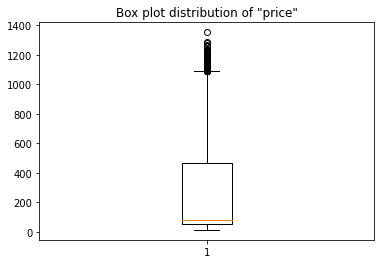

<ipython-input-15-b9f4698e8304>:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('price_outlier', 1, inplace=True)


229.78609928936243
249.67505500334298
Counter({0: 289222, 1: 10931})
(289222, 11)


<ipython-input-15-b9f4698e8304>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('price_outlier', 1, inplace=True)


In [15]:
plt.boxplot(df['price'])
plt.title('Box plot distribution of "price"')
plt.show()

# Valli's code
# Feature Engineering: removing outliers & adding new logged price column

# Creates a new column in the dataframe named 'price outlier'
df['price_outlier'] = 0

#to find the mean and standard deviation of the price values to work out the outlier
price_mean = np.mean(df['price'])
print(price_mean)
price_std = np.std(df['price'])
print(price_std)

#calculation to assign 0 or 1 to the price values (0 if the datapoint is not an outlier & 1 if it is)
df.loc[abs(df['price'] - price_mean) > 2 * price_std,'price_outlier'] = 1

#This counts the number of unique outlier values
print(Counter(df['price_outlier']))

df = df[df.price_outlier != 1]
print (df.shape)

# Dropping 'price outlier' column
df.drop('price_outlier', 1, inplace=True)

In [16]:
#Aakash's code

le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

# Find unique values within the stops column
print(list(set(df['stops'])))
# Match and replace the numerical values in text with integers
df['stops'] = df['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])

print(df)

<ipython-input-16-53f407739c4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline'] = le.fit_transform(df['airline'])
<ipython-input-16-53f407739c4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_city'] = le.fit_transform(df['source_city'])
<ipython-input-16-53f407739c4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

['two_or_more', 'zero', 'one']
        airline  source_city  departure_time  stops  arrival_time  \
184894        0            1               5      1             4   
186660        0            1               4      2             3   
186659        0            1               4      1             3   
186658        0            1               4      2             5   
186657        0            1               4      1             5   
...         ...          ...             ...    ...           ...   
211525        5            2               2      1             5   
211524        5            2               2      1             5   
87243         5            0               2      1             3   
87244         5            0               4      1             0   
87482         5            0               4      1             2   

        destination_city  class  duration  days_left   price  
184894                 2      1     10.92         33   27.25  
186660        

<ipython-input-16-53f407739c4a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = le.fit_transform(df['class'])
<ipython-input-16-53f407739c4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops'] = df['stops'].replace(["zero", "one", "two_or_more"], [0, 1, 2])


airline             0.181946
source_city        -0.004703
departure_time      0.054854
stops               0.099841
arrival_time        0.020913
destination_city   -0.013061
class              -0.948324
duration            0.212017
days_left          -0.072512
price               1.000000
Name: price, dtype: float64


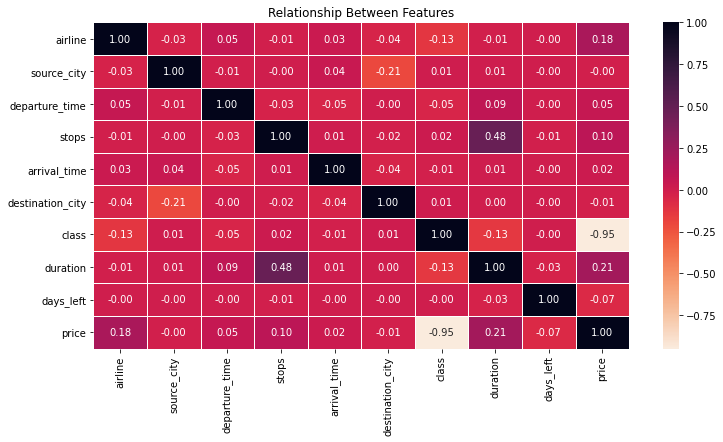

In [17]:
correlation_coeff = df.corr()
print(correlation_coeff["price"])

# Plotting a correlation heatmap of the features

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidth = .7, cmap="rocket_r")
plt.title("Relationship Between Features")
plt.show()

In [18]:
result = []
for x in df.columns:
    if x != 'price':
        result.append(x)
        
X = df[result].values
y = df['price'].values

In [19]:
# Use 5-fold split for 1 neighbour
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    knn_model = KNeighborsRegressor(n_neighbors=1)
    knn_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = knn_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 182.24470665457306
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 182.10919234486562
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 184.74825909688545
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 182.62893957161126
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 182.75791590010385
Fold #5, Training Size: 231378, Validation Size: 57844


In [28]:
# Use 5-fold split for 2 neighbours
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    knn_model = KNeighborsRegressor(n_neighbors=2)
    knn_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = knn_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 140.7337186164531
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 141.53829166782913
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 142.63610406061798
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 141.4001626671477
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 141.22066330877163
Fold #5, Training Size: 231378, Validation Size: 57844


In [21]:
# Use 5-fold split for 3 neighbours
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    knn_model = KNeighborsRegressor(n_neighbors=3)
    knn_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = knn_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 125.5153202567237
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 125.72066129337395
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 125.50351978058241
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 126.48331484700347
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 126.16887418315933
Fold #5, Training Size: 231378, Validation Size: 57844


In [22]:
# Use 5-fold split for 4 neighbours
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    knn_model = KNeighborsRegressor(n_neighbors=4)
    knn_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = knn_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 124.22680260990956
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 124.1279314041213
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 124.59194315826244
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 123.20640905348314
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 123.9901331277271
Fold #5, Training Size: 231378, Validation Size: 57844


In [23]:
# Use 5-fold split for 5 neighbours
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = knn_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 127.67906757782694
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 127.16991983742284
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 126.52980371595912
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 127.34274362750088
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 127.05563061684853
Fold #5, Training Size: 231378, Validation Size: 57844


In [24]:
# Use 5-fold split for 6 neighbours
kf = KFold(5,shuffle=True)

fold = 1

for train_index, validate_index in kf.split(X,y):
    knn_model = KNeighborsRegressor(n_neighbors=6)
    knn_model.fit(X[train_index],y[train_index])
    y_test = y[validate_index]
    y_pred = knn_model.predict(X[validate_index])
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f"Fold #{fold}, Training Size: {len(X[train_index])}, Validation Size: {len(X[validate_index])}")
    
    fold += 1

Root Mean Squared Error: 129.49185478340053
Fold #1, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 130.61051040000476
Fold #2, Training Size: 231377, Validation Size: 57845
Root Mean Squared Error: 129.63375951669437
Fold #3, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 129.4707616258651
Fold #4, Training Size: 231378, Validation Size: 57844
Root Mean Squared Error: 129.31980113802112
Fold #5, Training Size: 231378, Validation Size: 57844


In [25]:
parameters = {"n_neighbors": range(1, 5)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X, y)
gridsearch.best_params_

{'n_neighbors': 4}

<AxesSubplot: title={'center': 'kNN Model'}, xlabel='Actual', ylabel='Predicted'>

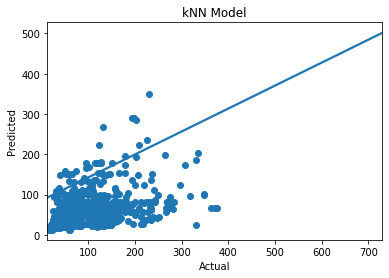

In [27]:
plt.scatter(y_pred[:2000], y_test[:2000])
plt.title('kNN Model')
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x = y_test, y = y_pred, scatter = False)